In [17]:
import os
import cv2 as cv
from pathlib import Path
from PIL import Image

In [18]:
dir_path = 'F:/Know_I/groceries/freiburg_groceries_dataset/images/'

paths = os.listdir(dir_path)
path_list = []
for path in paths:
    path_dict = {}
    l_path = path.lower()
    path_dict = {l_path: dir_path+path}
    path_list.append(path_dict)
print(path_list)
#l_path --> object
#path --> path of each category in the DIR_LIB Directory

[{'beans': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/BEANS'}, {'cake': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CAKE'}, {'candy': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CANDY'}, {'cereal': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CEREAL'}, {'chips': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CHIPS'}, {'chocolate': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CHOCOLATE'}, {'coffee': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/COFFEE'}, {'corn': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/CORN'}, {'fish': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/FISH'}, {'flour': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/FLOUR'}, {'honey': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/HONEY'}, {'jam': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/JAM'}, {'juice': 'F:/Know_I/groceries/freiburg_groceries_dataset/images/JUICE'}, {'milk': 'F:/Know_I/groceries/freib

In [3]:
row = 150
col = 150
channel = 3
X = []
y = []

In [8]:
def corresponding_label(label, image):
    return str(label)

#why corresponding_label function?? TO ensure the label assignments occur properly

In [21]:
from tqdm import tqdm #to reduce iteration speed

In [9]:
#to create the training data we will be working on
def training_data(label, image_dir):
    images = os.listdir(image_dir)
    for image in tqdm(images):
        image_path = os.path.join(image_dir, image)
        label = corresponding_label(label, image)
        X.append(cv.resize(cv.imread(image_path, cv.IMREAD_COLOR), (row, col), interpolation=cv.INTER_CUBIC))
        y.append(label)

In [10]:
def read_and_process(path_list):
    for path in tqdm(path_list):
        for label in path:
            training_data(label, path[label])

In [11]:
read_and_process(path_list)

 16%|█████████████▎                                                                     | 4/25 [00:06<00:32,  1.53s/it]


 50%|███████████████████████████████████████▋                                        | 54/109 [00:00<00:00, 171.42it/s]


 64%|██████████████████████████████████████████████████▊                            | 108/168 [00:00<00:00, 201.11it/s]


 60%|████████████████████████████████████████████████▏                               | 71/118 [00:00<00:00, 166.11it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:30<00:00,  1.21s/it]


In [15]:
print('X length: ',len(X))
print('y length: ',len(y))
#we have 9894 items (close to 10,000)

X length:  9894
y length:  9894


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Quantity')

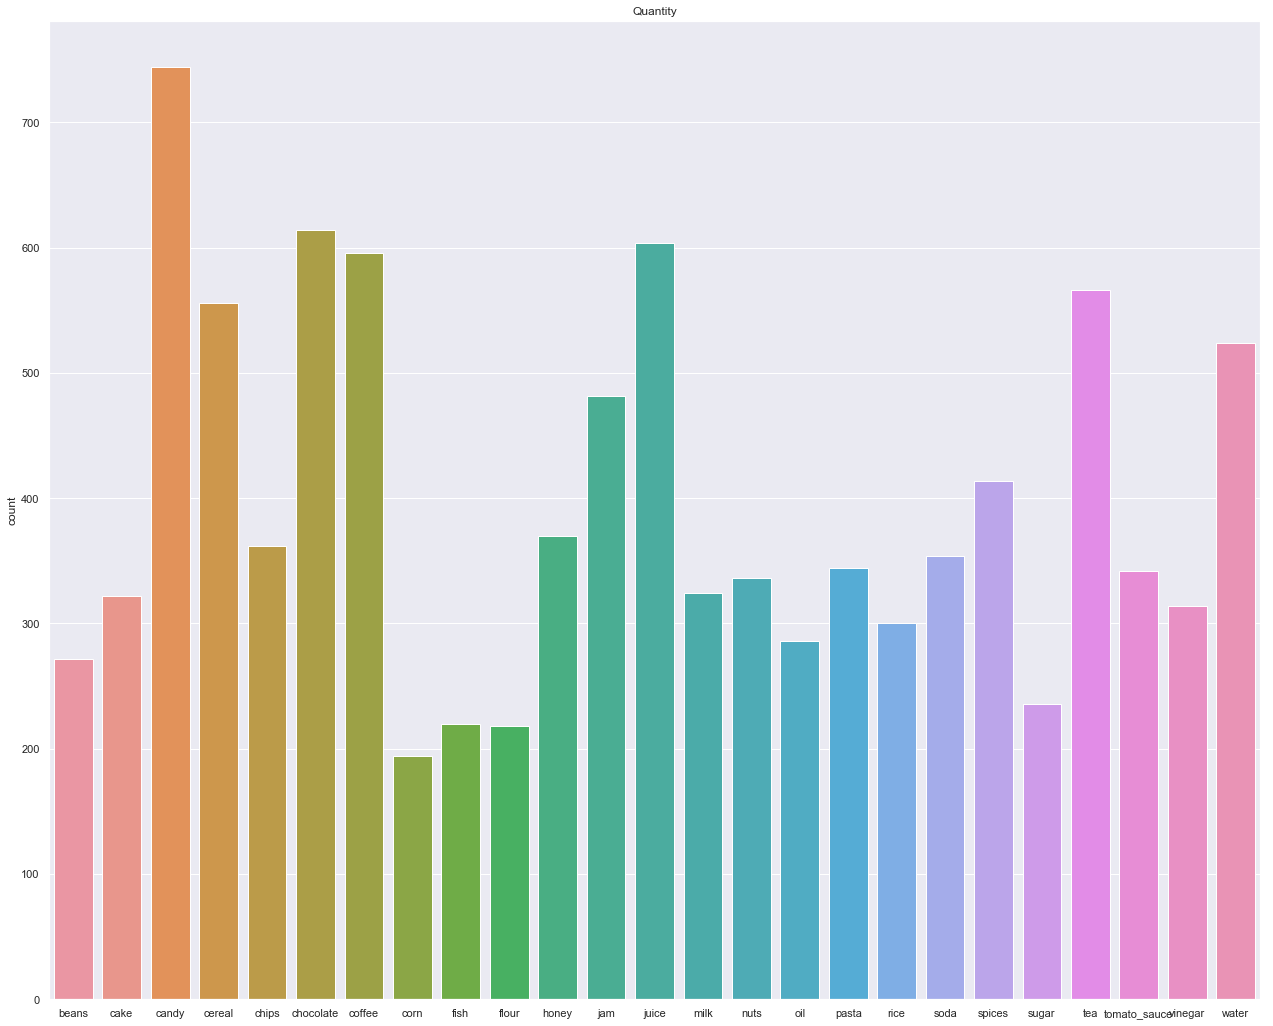

In [48]:
sns.countplot(y)
sns.set(rc={'figure.figsize':(21.7,18.0)}, font_scale=1)
plt.title('Quantity')

In [ ]:
#conclusion: most data for candy, least data for sugar... cut data to the amount of sugar for reduced bias while training